In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# Load model
model =tf.keras.models.load_model('/home/yamuna/ANPR/models/object_detection.h5')
print('model loaded successfully')

model loaded successfully


In [37]:
path = '/home/yamuna/ANPR/test_images/210.jpeg'
image = load_img(path)
image = np.array(image,dtype=np.uint8) # 8 bit array
image1 = load_img(path,target_size=(224,224))
# Convert into array and get the normalized output
image_arr_224 = img_to_array(image1)/255.0 

In [38]:
# Size of the original image
h,w,d = image.shape
print('Height of the Image =',h)
print('Width of the image =',w)

Height of the Image = 183
Width of the image = 275


<function matplotlib.pyplot.show(close=None, block=None)>

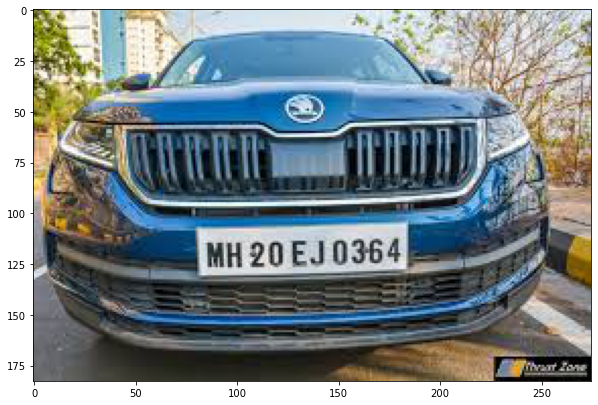

In [39]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show


In [40]:
image_arr_224.shape

(224, 224, 3)

In [41]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [42]:
# Make Predictions
coords = model.predict(test_arr)
coords

array([[0.19321126, 0.8700421 , 0.4243737 , 0.7437742 ]], dtype=float32)

In [43]:

## Denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[ 53.1330958 , 239.26157355,  77.6603846 , 136.11067414]])

In [44]:

coords = coords.astype(np.int32)
coords

array([[ 53, 239,  77, 136]], dtype=int32)



## Bounding box

(53, 77) (239, 136)


<function matplotlib.pyplot.show(close=None, block=None)>

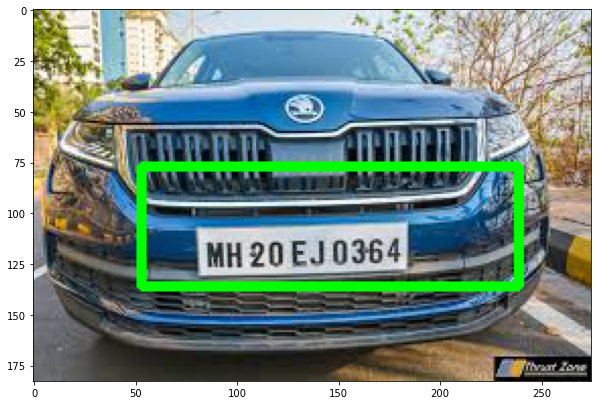

In [45]:
# draw bounding on the top of the image
xmin,xmax,ymin,ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show